In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import numpy as np
clean_tesla = pd.read_csv('../datasets/clean_tesla.csv')
clean_tweets = pd.read_csv('../datasets/clean_tweets.csv')
tw_tesla = pd.merge(clean_tweets, clean_tesla, how='inner', on='date')
tw_tesla = tw_tesla.sort_values(by='date', ascending=True)
tw_tesla

,date,hour,month,day,texto_limpio,text,user_followers,user_friends,retweets,favorites,Sentiment Category,compound,Volume,Open,Close
0,2022-07-05,17,7,5,find gold toe sock inevitably kilter amp washe...,@BillyM2k I find the gold toe sock – inevitabl...,101240855,115,335,6542,Negative,-0.6378,84581100,223.000000,233.066666
1,2022-07-05,17,7,5,sock con conference socks,"Sock Con, the conference for socks",101240806,115,1451,30753,Neutral,0.0000,84581100,223.000000,233.066666
2,2022-07-05,17,7,5,always something new magazine cover articles p...,Always something new for the magazine cover an...,101240806,115,1284,28610,Neutral,0.0000,84581100,223.000000,233.066666
3,2022-07-05,17,7,5,guy gets,@ExplainThisBob This guy gets it,101240806,115,131,3640,Neutral,0.0000,84581100,223.000000,233.066666
4,2022-07-05,17,7,5,sock tech advanced get pretty much anything so...,Sock tech is so advanced that you can get pret...,101240806,115,1191,23790,Positive,0.6369,84581100,223.000000,233.066666
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3909,2023-06-12,19,6,12,great predictor future,@realDailyWire Great predictor of the future,143325936,330,1034,21029,Positive,0.6249,150337900,247.940002,249.830002
3914,2023-06-12,16,6,12,dig grave,@TitterDaily @NPR They dig their own grave,143325958,330,802,12539,Somewhat Negative,-0.3818,150337900,247.940002,249.830002
3901,2023-06-13,1,6,13,doesnt make sense,@WallStreetSilv This doesn’t make sense,143325936,330,2358,21391,Neutral,0.0000,162384300,253.509995,258.709992
3900,2023-06-13,1,6,13,investigate,@Damadeferroofic Will investigate,143325936,330,217,4056,Neutral,0.0000,162384300,253.509995,258.709992


In [3]:
tw_tesla.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4053 entries, 0 to 3899
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   date                4053 non-null   object 
 1   hour                4053 non-null   int64  
 2   month               4053 non-null   int64  
 3   day                 4053 non-null   int64  
 4   texto_limpio        4002 non-null   object 
 5   text                4053 non-null   object 
 6   user_followers      4053 non-null   int64  
 7   user_friends        4053 non-null   int64  
 8   retweets            4053 non-null   int64  
 9   favorites           4053 non-null   int64  
 10  Sentiment Category  4053 non-null   object 
 11  compound            4053 non-null   float64
 12  Volume              4053 non-null   int64  
 13  Open                4053 non-null   float64
 14  Close               4053 non-null   float64
dtypes: float64(3), int64(8), object(4)
memory usage: 506.6+ KB


In [5]:
tw_tesla['date'] = pd.to_datetime(tw_tesla['date'])

In [8]:
sentimiento_diario = tw_tesla.groupby('date')['compound'].mean().reset_index()
sentimiento_diario.rename(columns={'compound': 'sentiment_avg'}, inplace=True)
tw_tesla = pd.merge(tw_tesla, sentimiento_diario, how='inner', on='date')

In [10]:
correlacion = tw_tesla['sentiment_avg'].corr(tw_tesla['Close'])
print(f"Correlación entre sentimiento promedio y precio de cierre: {correlacion:.4f}")


Correlación entre sentimiento promedio y precio de cierre: 0.0159


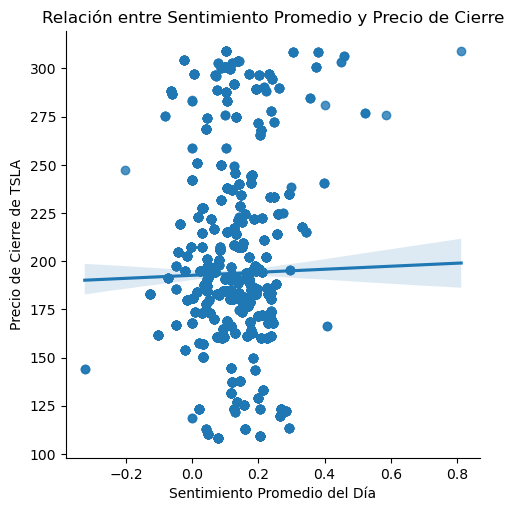

In [12]:
sns.lmplot(x='sentiment_avg', y='Close', data=tw_tesla)
plt.title("Relación entre Sentimiento Promedio y Precio de Cierre")
plt.xlabel("Sentimiento Promedio del Día")
plt.ylabel("Precio de Cierre de TSLA")
plt.show()

In [14]:
tw_tesla['sentiment_avg_lag1'] = tw_tesla['sentiment_avg'].shift(1)
correlacion_lag = tw_tesla['sentiment_avg_lag1'].corr(tw_tesla['Close'])
print(f"Correlación con 1 día de desfase: {correlacion_lag:.4f}")

Correlación con 1 día de desfase: 0.0162


In [16]:
tw_tesla['daily_change_pct'] = ((tw_tesla['Close'] - tw_tesla['Open']) / tw_tesla['Open']) * 100
tw_tesla['daily_change_usd'] = (tw_tesla['Close'] - tw_tesla['Open']) 


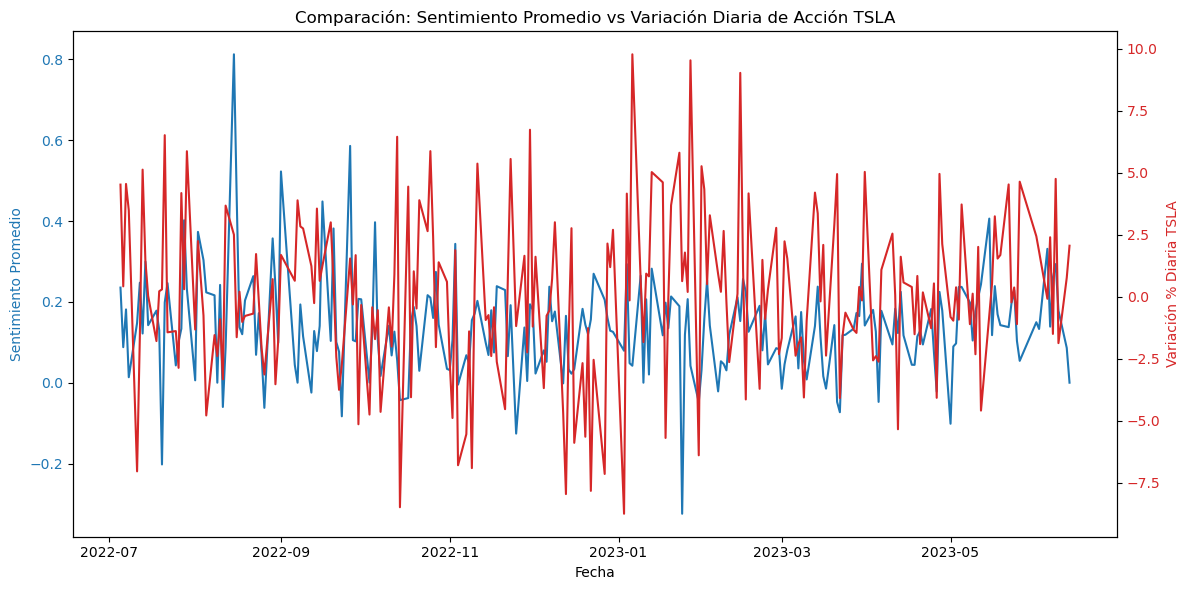

In [18]:
fig, ax1 = plt.subplots(figsize=(12, 6))

# Eje 1: sentimiento promedio
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Sentimiento Promedio', color='tab:blue')
ax1.plot(tw_tesla['date'], tw_tesla['sentiment_avg'], color='tab:blue', label='Sentimiento Promedio')
ax1.tick_params(axis='y', labelcolor='tab:blue')

# Eje 2: variación diaria del precio
ax2 = ax1.twinx()
ax2.set_ylabel('Variación % Diaria TSLA', color='tab:red')
ax2.plot(tw_tesla['date'], tw_tesla['daily_change_pct'], color='tab:red', label='Cambio % Diario')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Comparación: Sentimiento Promedio vs Variación Diaria de Acción TSLA')
fig.tight_layout()
plt.show()


In [19]:
correlacion = tw_tesla['sentiment_avg'].corr(tw_tesla['daily_change_pct'])
print(f"Correlación entre sentimiento y cambio diario: {correlacion:.4f}")


Correlación entre sentimiento y cambio diario: 0.1532


In [23]:
tw_tesla['sentiment_avg_lag1'] = tw_tesla['sentiment_avg'].shift(1)
correlacion_lag = tw_tesla['sentiment_avg_lag1'].corr(tw_tesla['daily_change_pct'])
print(f"Correlación con 1 día de desfase: {correlacion_lag:.4f}")

Correlación con 1 día de desfase: 0.1412


In [26]:
tw_tesla['sentiment_avg_3d'] = tw_tesla['sentiment_avg'].rolling(3).mean()
correlacion_rolling = tw_tesla['sentiment_avg_3d'].corr(tw_tesla['daily_change_pct'])
print(f"Correlación con media móvil de 3 días: {correlacion_rolling:.4f}")


Correlación con media móvil de 3 días: 0.1493


In [27]:
extremos = tw_tesla[abs(tw_tesla['sentiment_avg']) > 0.5]
correlacion_extremos = extremos['sentiment_avg'].corr(extremos['daily_change_pct'])
print(f"Correlación en días con sentimiento extremo: {correlacion_extremos:.4f}")


Correlación en días con sentimiento extremo: 0.9285


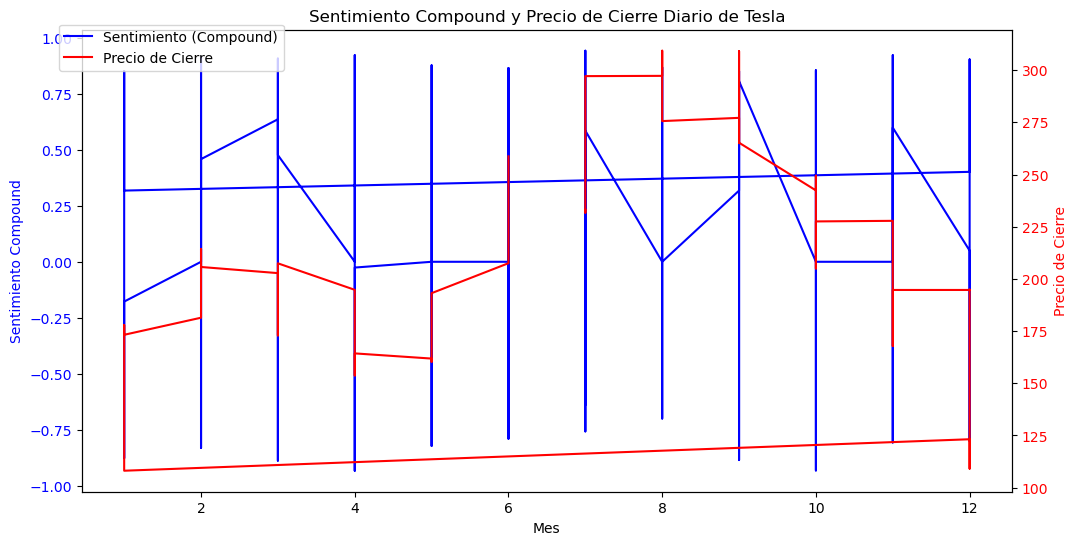

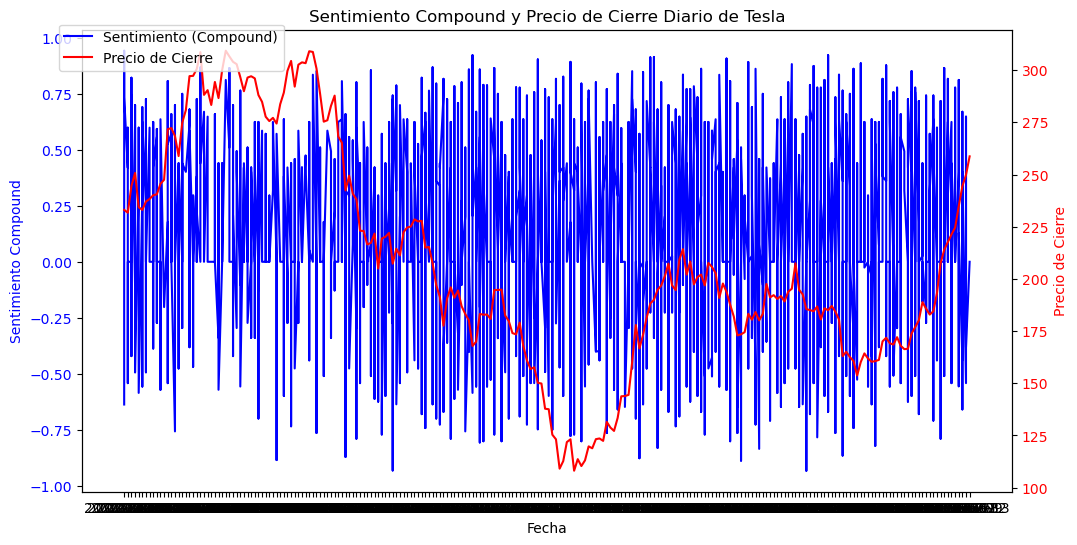

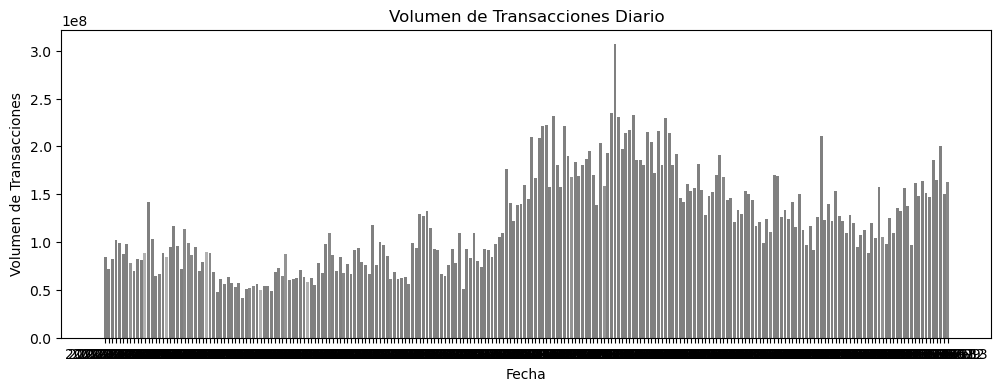

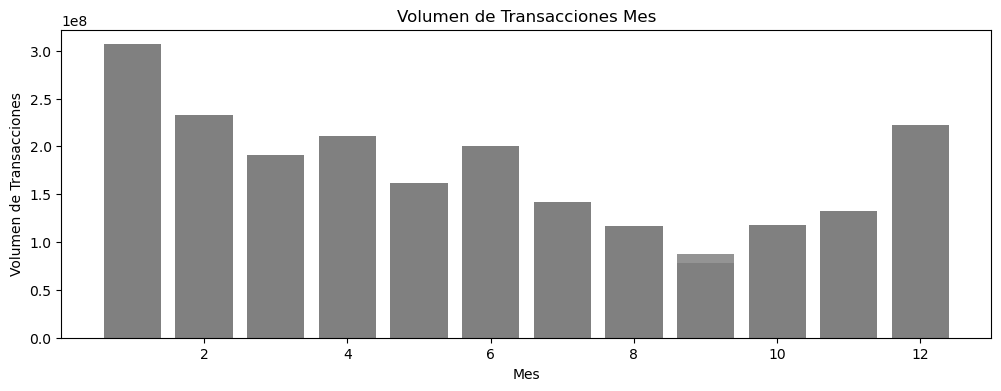

In [4]:
#mes
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(tw_tesla['month'], tw_tesla['compound'], label='Sentimiento (Compound)', color='blue')
ax1.set_xlabel('Mes')
ax1.set_ylabel('Sentimiento Compound', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(tw_tesla['month'], tw_tesla['Close'], label='Precio de Cierre', color='red')
ax2.set_ylabel('Precio de Cierre', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Sentimiento Compound y Precio de Cierre Diario de Tesla')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

#diario
fig, ax1 = plt.subplots(figsize=(12,6))
ax1.plot(tw_tesla['date'], tw_tesla['compound'], label='Sentimiento (Compound)', color='blue')
ax1.set_xlabel('Fecha')
ax1.set_ylabel('Sentimiento Compound', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

ax2 = ax1.twinx()
ax2.plot(tw_tesla['date'], tw_tesla['Close'], label='Precio de Cierre', color='red')
ax2.set_ylabel('Precio de Cierre', color='red')
ax2.tick_params(axis='y', labelcolor='red')

plt.title('Sentimiento Compound y Precio de Cierre Diario de Tesla')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()

#diario
plt.figure(figsize=(12,4))
plt.bar(tw_tesla['date'], tw_tesla['Volume'], color='gray', alpha=0.6)
plt.xlabel('Fecha')
plt.ylabel('Volumen de Transacciones')
plt.title('Volumen de Transacciones Diario')
plt.show()

#mes
plt.figure(figsize=(12,4))
plt.bar(tw_tesla['month'], tw_tesla['Volume'], color='gray', alpha=0.6)
plt.xlabel('Mes')
plt.ylabel('Volumen de Transacciones')
plt.title('Volumen de Transacciones Mes')
plt.show()

In [ ]:
volumen_mayor = tw_tesla.loc[tw_tesla['Volume'].idxmax()]
print(volumen_mayor)

date                                        2023-01-27
hour                                                 7
texto_limpio                                      sure
text                  @jim_desmond Sure @boringcompany
Sentiment Category                   Somewhat Positive
compound                                        0.3182
Volume                                     306590600.0
Close                                       177.899994
Name: 2877, dtype: object


Se detecta que el maximo volumen de transacciones durante el periodo analizado es el 23-02-27. Sin embargo el sentimiento registrado en twitter no varia acorde. Se debe investigar mas a fondo lo sucedido alrededor de esa fecha

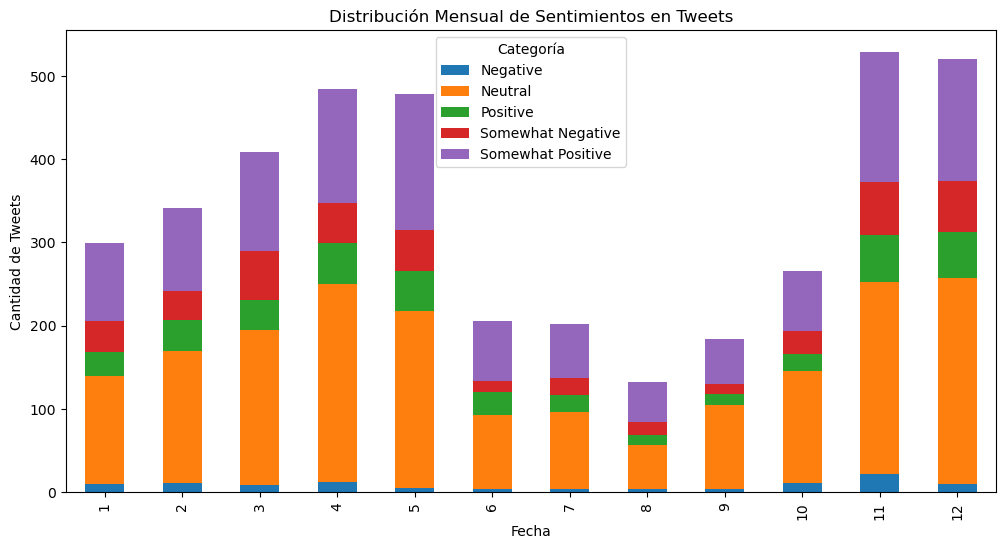

In [5]:
daily_sentiment = tw_tesla.groupby(['month', 'Sentiment Category']).size().unstack(fill_value=0)

# Gráfico de barras apiladas
daily_sentiment.plot(kind='bar', stacked=True, figsize=(12,6))
plt.title('Distribución Mensual de Sentimientos en Tweets')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Tweets')
plt.legend(title='Categoría')
plt.show()


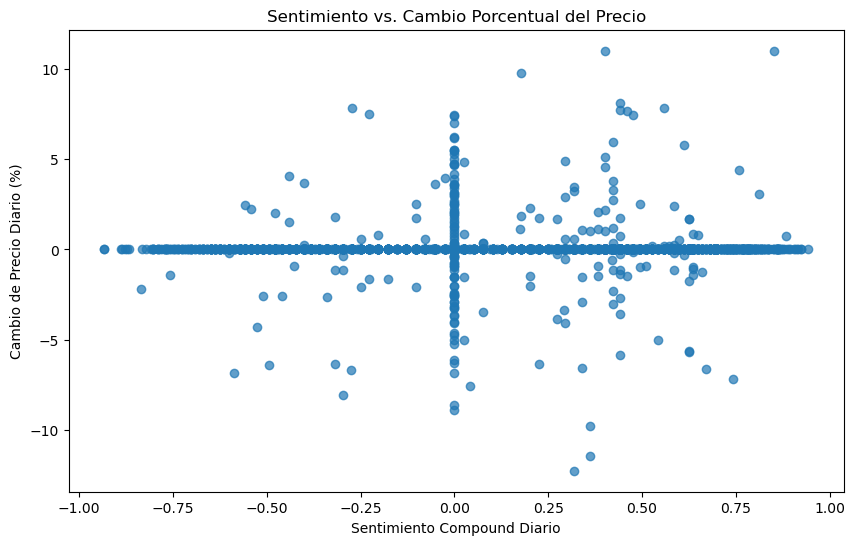

In [11]:
tw_tesla['price_change'] = tw_tesla['Close'].pct_change() * 100

plt.figure(figsize=(10,6))
plt.scatter(tw_tesla['compound'], tw_tesla['price_change'], alpha=0.7)
plt.xlabel('Sentimiento Compound Diario')
plt.ylabel('Cambio de Precio Diario (%)')
plt.title('Sentimiento vs. Cambio Porcentual del Precio')
plt.show()


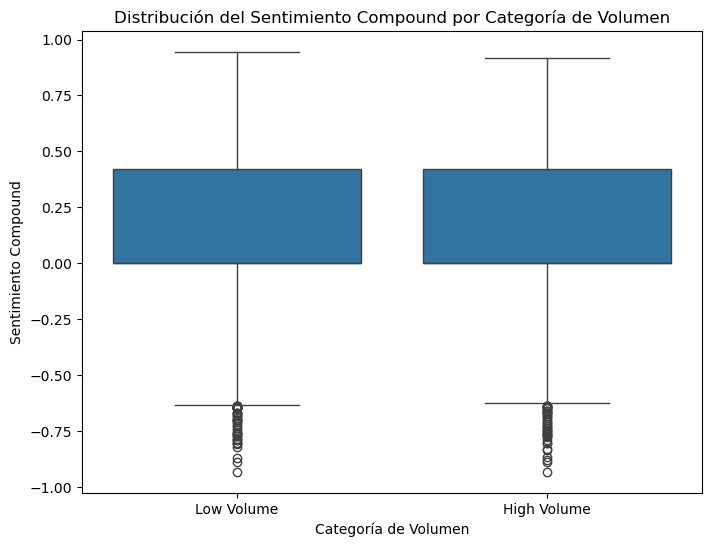

In [ ]:
volume_threshold = tw_tesla['Volume'].median()
tw_tesla['volume_category'] = tw_tesla['Volume'].apply(lambda x: 'High Volume' if x >= volume_threshold else 'Low Volume')

plt.figure(figsize=(8,6))
sns.boxplot(x='volume_category', y='compound', data=tw_tesla)
plt.title('Distribución del Sentimiento Compound por Categoría de Volumen')
plt.xlabel('Categoría de Volumen')
plt.ylabel('Sentimiento Compound')
plt.show()

In [14]:
tw_tesla.head()

,date,hour,month,texto_limpio,text,Sentiment Category,compound,Volume,Close,price_change
0,2022-07-05,17,7,find gold toe sock inevitably kilter amp washe...,@BillyM2k I find the gold toe sock – inevitabl...,Negative,-0.6378,84581100,233.066666,NaN
1,2022-07-05,17,7,sock con conference socks,"Sock Con, the conference for socks",Neutral,0.0000,84581100,233.066666,0.0
2,2022-07-05,17,7,always something new magazine cover articles p...,Always something new for the magazine cover an...,Neutral,0.0000,84581100,233.066666,0.0
3,2022-07-05,17,7,guy gets,@ExplainThisBob This guy gets it,Neutral,0.0000,84581100,233.066666,0.0
4,2022-07-05,17,7,sock tech advanced get pretty much anything so...,Sock tech is so advanced that you can get pret...,Positive,0.6369,84581100,233.066666,0.0


In [13]:
pearson_corr, p_val = stats.pearsonr(tw_tesla['compound'], tw_tesla['price_change'])
print("Coeficiente de Pearson:", pearson_corr)
print("P-value:", p_val)

# Calcular correlación de Spearman (si la relación puede ser no lineal)
spearman_corr, p_val_s = stats.spearmanr(tw_tesla['compound'], tw_tesla['price_change'])
print("Coeficiente de Spearman:", spearman_corr)
print("P-value Spearman:", p_val_s)

Coeficiente de Pearson: nan
P-value: nan
Coeficiente de Spearman: nan
P-value Spearman: nan


In [28]:
tw_tesla.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4053 entries, 0 to 4052
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                4053 non-null   datetime64[ns]
 1   hour                4053 non-null   int64         
 2   month               4053 non-null   int64         
 3   day                 4053 non-null   int64         
 4   texto_limpio        4002 non-null   object        
 5   text                4053 non-null   object        
 6   user_followers      4053 non-null   int64         
 7   user_friends        4053 non-null   int64         
 8   retweets            4053 non-null   int64         
 9   favorites           4053 non-null   int64         
 10  Sentiment Category  4053 non-null   object        
 11  compound            4053 non-null   float64       
 12  Volume              4053 non-null   int64         
 13  Open                4053 non-null   float64     

In [29]:
tw_tesla_extremos = tw_tesla[tw_tesla['compound'].abs() > 0.5]
print(f"Días con sentimiento extremo: {len(tw_tesla_extremos)}")


Días con sentimiento extremo: 786


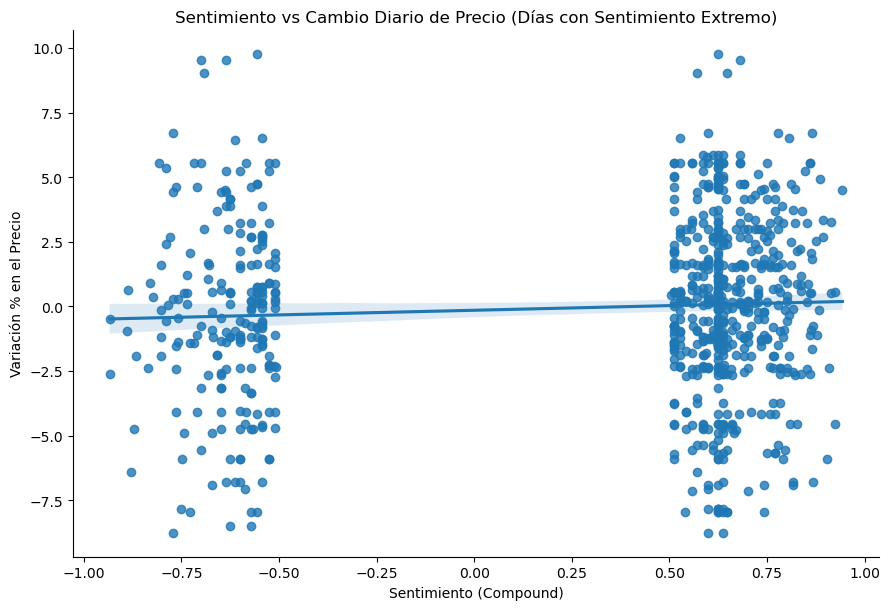

In [30]:
sns.lmplot(data=tw_tesla_extremos, x='compound', y='daily_change_pct', height=6, aspect=1.5)
plt.title("Sentimiento vs Cambio Diario de Precio (Días con Sentimiento Extremo)")
plt.xlabel("Sentimiento (Compound)")
plt.ylabel("Variación % en el Precio")
plt.show()


In [37]:
# Filtrar solo días extremos según el promedio diario
extremos_df = tw_tesla[tw_tesla['sentiment_avg'].abs() > 0.2]

# Agrupar por fecha y obtener una fila por día
extremos_por_dia = extremos_df.groupby('date').agg({
    'sentiment_avg': 'mean',
    'daily_change_pct': 'mean'
}).reset_index()


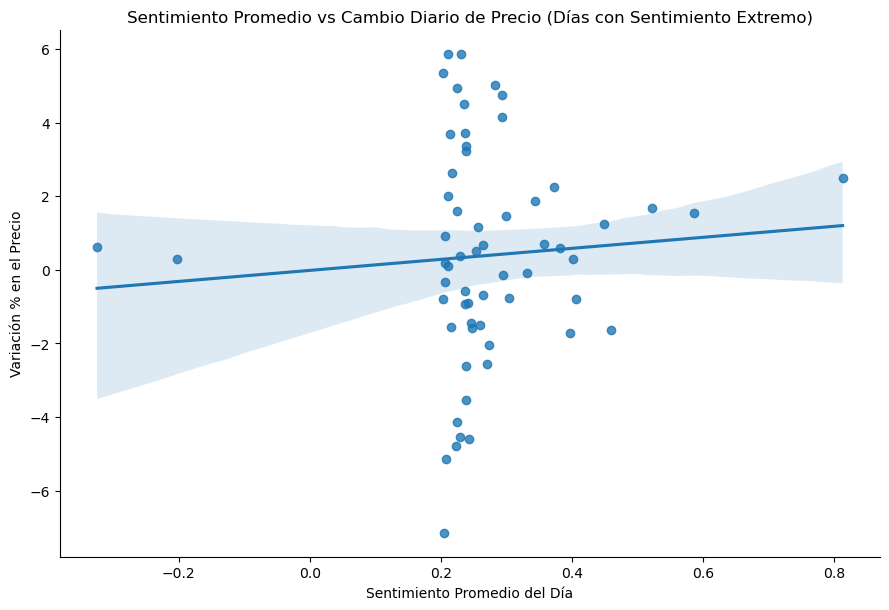

In [38]:
sns.lmplot(data=extremos_por_dia, x='sentiment_avg', y='daily_change_pct', height=6, aspect=1.5)
plt.title("Sentimiento Promedio vs Cambio Diario de Precio (Días con Sentimiento Extremo)")
plt.xlabel("Sentimiento Promedio del Día")
plt.ylabel("Variación % en el Precio")
plt.show()


In [39]:
correlacion_verificada = extremos_por_dia['sentiment_avg'].corr(extremos_por_dia['daily_change_pct'])
print(f"Correlación real entre sentimiento promedio y cambio diario (filtrado): {correlacion_verificada:.4f}")


Correlación real entre sentimiento promedio y cambio diario (filtrado): 0.0758


In [42]:
tw_tesla['influencia_sentimental'] = tw_tesla['compound'] * (1 + tw_tesla['retweets'])
tw_tesla['influencia_sentimental_log'] = tw_tesla['compound'] * np.log1p(tw_tesla['retweets'])
